# Regression and Moderation

## Load Data

`data = sm.datasets.anes96.data.load_pandas().data`

`data = sm.datasets.grunfeld.data.load_pandas().data  # mlm`

In [1]:
%load_ext autoreload
%autoreload 2

import statsmodels.api as sm
import glmax

print(dir(glmax))

data = sm.datasets.ccard.data.load_pandas().data.rename_axis("subject")
data

['DUMMY_GLOBAL', 'Regression', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'analysis', 'ax', 'class_regression', 'constants', 'mod', 'pl', 'pp', 'processing', 'simulation', 'sm', 'sys', 'tl', 'utils', 'visualization']


,AVGEXP,AGE,INCOME,INCOMESQ,OWNRENT
subject,,,,,
0,124.98,38.0,4.52,20.4304,1.0
1,9.85,33.0,2.42,5.8564,0.0
2,15.00,34.0,4.50,20.2500,1.0
3,137.87,31.0,2.54,6.4516,0.0
4,546.50,32.0,9.79,95.8441,1.0
...,...,...,...,...,...
67,68.38,43.0,2.40,5.7600,0.0
68,474.15,33.0,6.00,36.0000,1.0
69,234.05,25.0,3.60,12.9600,0.0


## Create Model

In [ ]:
fml = "AVGEXP ~ INCOME + AGE + OWNRENT + INCOME*AGE*OWNRENT"
self = glmax.Regression(file_path=data, model=fml)

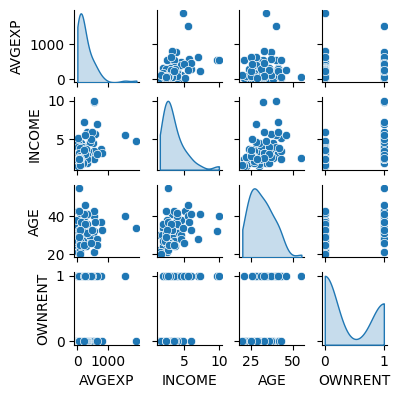

In [32]:
import seaborn as sns

vvv = [i for i in [self.model["y"]] + self.model["x"]]
kind_dist="kde"
diag_kws={"cut": 0, "fill": True}
figsize = (3, 3)
grid_kws = {"diag_sharey": False}

sns.pairplot(self.data[vvv], diag_kind=kind_dist, diag_kws=diag_kws,
             grid_kws=grid_kws, height=1,
             aspect=1)

## Tabulate and Plot Descriptives

### Without Group Color-Coding

In [ ]:
figs = self.describe()

### With Group Color-Coding

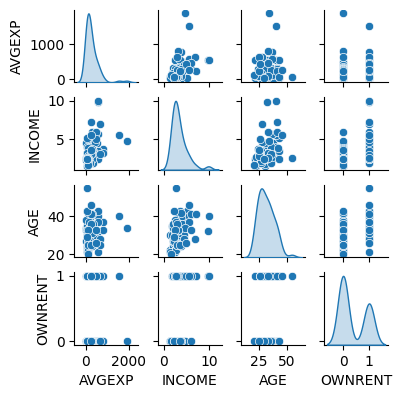

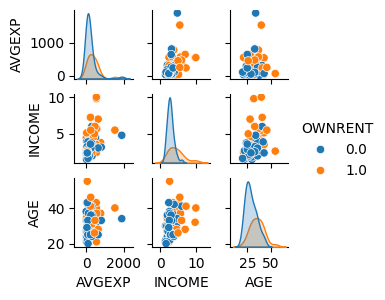

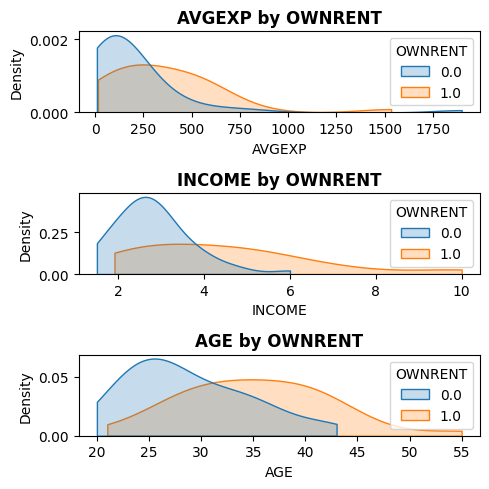

In [41]:
figs = self.describe(groups="OWNRENT", figsize=(5, 5))